## Import libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [3]:
data = pd.read_csv('../data/credit_card_default.csv')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_1                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [5]:
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [6]:
data = data.set_index('ID')

In [7]:
## I find it easier to rename columns to lower case alphabets.

data.rename(columns=lambda x: x.lower(), inplace=True)
data

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [8]:
data.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object')

In [9]:
# It would be useful to collect all supposed numerical features together.

pay_amt_feat = ['pay_amt' + str(i) for i in range(1,7)]
bill_amt_feat = ['bill_amt' + str(i) for i in range(1, 7)]
num_feat = ['limit_bal', 'age'] + pay_amt_feat + bill_amt_feat
num_feat

['limit_bal',
 'age',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6']

In [10]:
# let's see the statistical summary of some columns

data[['age', 'limit_bal' ]].describe().round().T

,count,mean,std,min,25%,50%,75%,max
age,30000.0,35.0,9.0,21.0,28.0,34.0,41.0,79.0
limit_bal,30000.0,167484.0,129748.0,10000.0,50000.0,140000.0,240000.0,1000000.0


**Observations:** 

- The mean amount of credit issued by the financial institution is around $167,000.

- There is a wide disparity between credit amounts, I can deduce that most people take credit in tens of thousands as shown in the stadard deviation.

- Mean age of customers is around 35 years. oldest customer is around 80 years


In [12]:
#data.groupby(by='age')[bill_amt_feat].count()

In [13]:
data[pay_amt_feat].describe().round()

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,5664.0,5921.0,5226.0,4826.0,4799.0,5216.0
std,16563.0,23041.0,17607.0,15666.0,15278.0,17777.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,1000.0,833.0,390.0,296.0,252.0,118.0
50%,2100.0,2009.0,1800.0,1500.0,1500.0,1500.0
75%,5006.0,5000.0,4505.0,4013.0,4032.0,4000.0
max,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0


**Observations:**

- Min payment is $0 across the whole payment amount history of customers per month, which could mean they defaulted.


In [15]:
# Lets take a look at the bill_amt.
data[bill_amt_feat].describe().round(3)

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
count,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000
mean,51223.331,49179.075,47013.155,43262.949,40311.401,38871.760
std,73635.861,71173.769,69349.387,64332.856,60797.156,59554.108
min,-165580.000,-69777.000,-157264.000,-170000.000,-81334.000,-339603.000
25%,3558.750,2984.750,2666.250,2326.750,1763.000,1256.000
50%,22381.500,21200.000,20088.500,19052.000,18104.500,17071.000
75%,67091.000,64006.250,60164.750,54506.000,50190.500,49198.250
max,964511.000,983931.000,1664089.000,891586.000,927171.000,961664.000


**Observations:**

- A negative <b>bill_amt</b> balance means bill was over paid therefore, customer may be eligible for a refund and vice versa.

- from the statistical summary, we notice that the min <b>bill_amt</b> in every case is negative. with this the financial institution will know when customers may be eligible for a credit or refund.

- So far, the data makes sense as description is typical of any financial institution.

- Also, in contrast with the pay_amt the means of the <b>bill_amt</b> are much higher than that of the <b>pay_amt</b>. Which means that on average, customers pay less than they are billed.

## Data Preprocessing

In [18]:
# Let's begin with the <b>sex</b> column where the values are binary, male or female. In recent times we could have 'unspecified'.

In [19]:
data['sex'].value_counts().to_frame()

,count
sex,
2,18112
1,11888


Where 1 = customer is a male and 2 = customer is a female. We have to encode this to mean a categorical variable otherwise the model will treat the entries as numerical variables. We will this using the code below;

In [21]:
data['male'] = (data['sex']==1).astype('int')
data

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month,male
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,0
2,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,0
3,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
4,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,1
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,5190,0,1837,3526,8998,129,0,0,0,1
29998,30000,1,2,2,37,4,3,2,-1,0,...,20582,19357,0,0,22000,4200,2000,3100,1,1


In [22]:
data['male'].mean().round(4)

0.3963

So we have successfully transformed the 'sex' column to categorical and created a new column called 'male'.

In [24]:
# Next, we look for other supposed categorical columns in our data set and encode them appropriately.

In [25]:
# Let's continue with marriage

In [26]:
data['marriage'].nunique()

3

In [27]:
data.marriage.value_counts()

marriage
2    15964
1    13713
3      323
Name: count, dtype: int64

Notice here that we have 3 categories namely 1 = married, 2 = single, 3 = other.

In [29]:
#data['single'] = (data['marriage']==2).astype('int')
#data['marriage_other'] = (data['marriage']==3).astype('int')

#print('proportion of singles:', data['single'].mean().round(4))
#print('\nproportion of other as marital status:', data['marriage_other'].mean().round(4))

Alternatively we could simply encode the married values in the marriage column and automatically the others will be single

In [31]:
data['married'] = (data['marriage']==1).astype('int')

In [32]:
data

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month,male,married
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,0,0
3,90000,2,2,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,0
4,50000,2,2,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,1
5,50000,1,2,1,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,0,1,1
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,0,1837,3526,8998,129,0,0,0,1,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,19357,0,0,22000,4200,2000,3100,1,1,0


The percentage of customers whose marital status is other, as around 1%, which means that nearly 99% pf the values in that indicator variable are just zero. Hence we can say that the variable can be considered to have almost a constant value.

Such type of features usually don't provide useful information to any model. Those features are knowns as low variance features, because their values almost never vary (and therefore their variance is near to zero). Therefore, it is better to exlude them from our model since they add no predictive information to our model due to lack of variability.

In [34]:
data

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month,male,married
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,0,0
3,90000,2,2,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,0
4,50000,2,2,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,1
5,50000,1,2,1,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,0,1,1
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,0,1837,3526,8998,129,0,0,0,1,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,19357,0,0,22000,4200,2000,3100,1,1,0


In [35]:
# Let's try to do the same for the 'Education column'. First, we take a look at the values present.

data['education'].value_counts()

education
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

According to the data description we have the following encoding 1 = Graduate, 2 = University, 3 = High School, 4 = others. We do not know what 0, 5 and 6 are. 

Since there are few of these data points, We would assume that they belong to other category.


In [37]:
# One-hot encoding for the education column

In [38]:
data['high_school'] = (data['education']==3).astype('int')
data['university'] = (data['education']==2).astype('int')
data['graduate_school'] = (data['education']==1).astype('int')

In [39]:
#data.drop(columns='University')

We don't need to encode the 'other' because it has already been encoded by encoding the first graduate, university and High school categories.


In [41]:
# Let's verify how our encoding has performed.

data.loc[(data['high_school']==0) & (data['university']==0) & (data['graduate_school']==0)]['education']

ID
48       5
70       5
359      4
386      5
449      4
        ..
29837    6
29840    5
29848    4
29921    5
29967    5
Name: education, Length: 468, dtype: int64

In [42]:
data

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month,male,married,high_school,university,graduate_school
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,1,0,1,0,1,0
2,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,0,2000,1,0,0,0,1,0
3,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,1000,5000,0,0,0,0,1,0
4,50000,2,2,1,37,0,0,0,0,0,...,1200,1100,1069,1000,0,0,1,0,1,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,10000,9000,689,679,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,5003,3047,5000,1000,0,1,1,1,0,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8998,129,0,0,0,1,0,1,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,22000,4200,2000,3100,1,1,0,0,1,0


<b> Why do we encode only k-1 objects and not k?</b> 

Take for instance the 'sex' column, we haave that a customer can either be a male or a female and then we went on to encode only male. The reason for encoding only male here is to avoid collinearity, this happens when we can know the value of one from the other from a linear combination of the other features. encode only male is enough to preserve the information of the 'sex' column and so, if male is encoded as 0, then automatically female is encoded as 1.

This method helps to avoid having redundant features in our data which could be a for our model.

This same principle applies to the 'education' column.

## Feature Engineering

In [45]:
# let's take a close look at the pay_1 - pay_6 columns. Takig pay_1 as a guide, let's take a look at the distribution of values here

data['pay_1'].value_counts().sort_index()

pay_1
-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: count, dtype: int64

Here we notice values -2, -1, 0, but we know thats pay_1 - pay_6 columns tells us how many months a customer owe this financial institution.
however, we do not know what -2 and -1 means here. 

Now, suppose we go back to the originators of the dataset to enquire what this means and we are told that they mean customers **NOT** owing for 2 or 1 month, this makes sense. 

We could transform the -1 and -2 to 0 (because these people arwe not delayed, that is delayed by zero months) and use the value they have, comsidering them as numerical variables.

Also, we can then go ahead and categorize these features as <i> pay </i> and <i>delayed</i>.

Notice from the data value distribution that fewer people delayed payment for more than 2 months.

In [47]:
# collecting the pay_i features into the zero value to indicate not owing for any number of months.

pay_feat = ['pay_' + str(i) for i in range(1, 7)]
for x in pay_feat:
    data.loc[data[x] <= 0, x] = 0
    
# producing delayed features

delayed_feat = ['delayed_' + str(i) for i in range(1, 7)]
for pay, delayed in zip(pay_feat, delayed_feat):
    data[delayed] = (data[pay] > 0).astype(int)

In [48]:
data[delayed_feat].mean()

delayed_1    0.227267
delayed_2    0.147933
delayed_3    0.140433
delayed_4    0.117000
delayed_5    0.098933
delayed_6    0.102633
dtype: float64

In [49]:
data[pay_feat].mean()

pay_1    0.356767
pay_2    0.320033
pay_3    0.304067
pay_4    0.258767
pay_5    0.221500
pay_6    0.226567
dtype: float64

In [50]:
# Let's create a new feature called 'months_delayed'
data['months_delayed'] = data[delayed_feat].sum(axis=1)

In [51]:
data.rename(columns={'default payment next month':'default'}, inplace=True)
data['default']

ID
1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default, Length: 30000, dtype: int64

Where 1 means the a customer will default next month and 0 means the customer will pay next month.

In [53]:
numerical_features =  num_feat + ['months_delayed']
categorical_features = ['male', 'married', 'graduate_school', 'university', 'high_school']

#Extract the main features for our model

X = data[numerical_features + categorical_features]
y = data['default']

In [54]:
data.corr().loc['default']

limit_bal         -0.153520
sex               -0.039961
education          0.028006
marriage          -0.025586
age                0.013890
pay_1              0.396019
pay_2              0.327093
pay_3              0.286999
pay_4              0.269055
pay_5              0.260850
pay_6              0.244437
bill_amt1         -0.019644
bill_amt2         -0.014193
bill_amt3         -0.014076
bill_amt4         -0.010156
bill_amt5         -0.006760
bill_amt6         -0.005372
pay_amt1          -0.072929
pay_amt2          -0.058579
pay_amt3          -0.056250
pay_amt4          -0.056827
pay_amt5          -0.055124
pay_amt6          -0.053183
default            1.000000
male               0.039961
married            0.028646
high_school        0.032403
university         0.036467
graduate_school   -0.051328
delayed_1          0.368117
delayed_2          0.338022
delayed_3          0.293583
delayed_4          0.275495
delayed_5          0.266959
delayed_6          0.246089
months_delayed     0

In [55]:
X

,limit_bal,age,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,months_delayed,male,married,graduate_school,university,high_school
ID,,,,,,,,,,,,,,,,,,,,
1,20000,24,0,689,0,0,0,0,3913,3102,689,0,0,0,2,0,1,0,1,0
2,120000,26,0,1000,1000,1000,0,2000,2682,1725,2682,3272,3455,3261,2,0,0,0,1,0
3,90000,34,1518,1500,1000,1000,1000,5000,29239,14027,13559,14331,14948,15549,0,0,0,0,1,0
4,50000,37,2000,2019,1200,1100,1069,1000,46990,48233,49291,28314,28959,29547,0,0,1,0,1,0
5,50000,57,2000,36681,10000,9000,689,679,8617,5670,35835,20940,19146,19131,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39,8500,20000,5003,3047,5000,1000,188948,192815,208365,88004,31237,15980,0,1,1,0,0,1
29997,150000,43,1837,3526,8998,129,0,0,1683,1828,3502,8979,5190,0,0,1,0,0,0,1
29998,30000,37,0,0,22000,4200,2000,3100,3565,3356,2758,20878,20582,19357,3,1,0,0,1,0


In [56]:
#df = pd.concat([X, y], axis=1)
#df

In [57]:
# Let's see how these variables correlate with our target column.
#df.corr().loc['default'][:-1]

In [58]:
y.value_counts(normalize=True)

default
0    0.7788
1    0.2212
Name: proportion, dtype: float64

So we have an unbalanced target set, so we would use the stratify argument when splitting the dataset so that every train and test set will capture similar distribution and as such our model will not end up predicting the wrong outcome most of the time. 

In [60]:
#Next, we standardize the numerical features, so they are in the same scale with  mean 0 and standard deviation 1
from sklearn.preprocessing import StandardScaler

# Create a instance of the class.
scaler = StandardScaler()

# Use the fit method of the instance
scaler.fit(X[numerical_features])

# Use the transform method to perform the transformation
X.loc[:, numerical_features] = scaler.transform(X[numerical_features])

C:\Users\nenec\AppData\Local\Temp\ipykernel_2240\393289451.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.13672015 -0.3659805  -0.59720239 ... -1.05964618 -0.67427636
 -0.90549825]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, numerical_features] = scaler.transform(X[numerical_features])
C:\Users\nenec\AppData\Local\Temp\ipykernel_2240\393289451.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.24601985 -1.02904717 -0.16115646 ...  0.16430256  0.59824792
  1.14067961]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, numerical_features] = scaler.transform(X[numerical_features])
C:\Users\nenec\AppData\Local\Temp\ipykernel_2240\393289451.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a

In [61]:
X.loc[:,numerical_features]

,limit_bal,age,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,months_delayed
ID,,,,,,,,,,,,,,,
1,-1.136720,-1.246020,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,0.750059
2,-0.365981,-1.029047,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,0.750059
3,-0.597202,-0.161156,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.536713
4,-0.905498,0.164303,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.536713
5,-0.905498,2.334029,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.536713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.404759,0.381275,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,-0.536713
29997,-0.134759,0.815221,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.536713
29998,-1.059646,0.164303,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,1.393445


In [62]:
# Next we split our data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [63]:
## Training The Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Create an instance of the model
logreg = LogisticRegression()

# Fit the model to the train and test data
logreg.fit(X_train, y_train)

# get predictions
y_pred = logreg.predict(X_test)
y_pred[:30]


array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [64]:
# Lets see how they compare.

compare = pd.DataFrame({'Predicted class': y_pred, 'Actual class': y_test})
compare[:30]

,Predicted class,Actual class
ID,,
8942,0,0
17619,0,1
27896,0,0
16104,1,0
4423,0,0
3834,0,0
26190,0,0
25055,0,1
23469,1,1


In [65]:
# Let's get the predicted probabilities.

logreg_prob = logreg.predict_proba(X_test)
logreg_prob[:30]

array([[0.86170959, 0.13829041],
       [0.63427823, 0.36572177],
       [0.92988738, 0.07011262],
       [0.26987126, 0.73012874],
       [0.84168723, 0.15831277],
       [0.87933048, 0.12066952],
       [0.89874727, 0.10125273],
       [0.81232955, 0.18767045],
       [0.21092767, 0.78907233],
       [0.79445659, 0.20554341],
       [0.87237981, 0.12762019],
       [0.74735996, 0.25264004],
       [0.83734536, 0.16265464],
       [0.2424209 , 0.7575791 ],
       [0.29325163, 0.70674837],
       [0.34315126, 0.65684874],
       [0.63278498, 0.36721502],
       [0.82550341, 0.17449659],
       [0.81982752, 0.18017248],
       [0.89065955, 0.10934045],
       [0.60428966, 0.39571034],
       [0.76118444, 0.23881556],
       [0.42118483, 0.57881517],
       [0.83013548, 0.16986452],
       [0.97117808, 0.02882192],
       [0.98476525, 0.01523475],
       [0.8425346 , 0.1574654 ],
       [0.19489968, 0.80510032],
       [0.88861609, 0.11138391],
       [0.84402761, 0.15597239]])

These predictions are produced by the use of probabilities, the prediction for which the probability is larger, or equivalently predicts 1 wen the second column of logreg_prob is greater than 0.5. We canverify this with the below snippet;

In [67]:
np.all(y_pred==(logreg_prob[:,1]>0.5))

True

In [68]:
# Let's see the coefficients associated with each features used for the prediction.
pd.Series(data=logreg.coef_[0], index=X_train.columns).sort_values(ascending=False).round(4)

graduate_school    0.8714
university         0.8287
high_school        0.8039
months_delayed     0.7646
married            0.1561
bill_amt2          0.1386
bill_amt3          0.1384
male               0.1227
age                0.0255
bill_amt4          0.0025
pay_amt3           0.0023
pay_amt5           0.0005
pay_amt4          -0.0294
bill_amt5         -0.0393
pay_amt6          -0.0537
bill_amt6         -0.0746
bill_amt1         -0.1067
pay_amt1          -0.1727
limit_bal         -0.1896
pay_amt2          -0.2740
dtype: float64

In [69]:
#let's get the accuracy score of the logreg model.
from sklearn.metrics import accuracy_score, classification_report
lr_acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'lgr_Accuracy:{lr_acc:.3%}')
print('\nClassification report:', classification_report(y_test, y_pred))


lgr_Accuracy:80.122%

Classification report:               precision    recall  f1-score   support

           0       0.82      0.96      0.88      7009
           1       0.63      0.25      0.36      1991

    accuracy                           0.80      9000
   macro avg       0.72      0.60      0.62      9000
weighted avg       0.78      0.80      0.77      9000



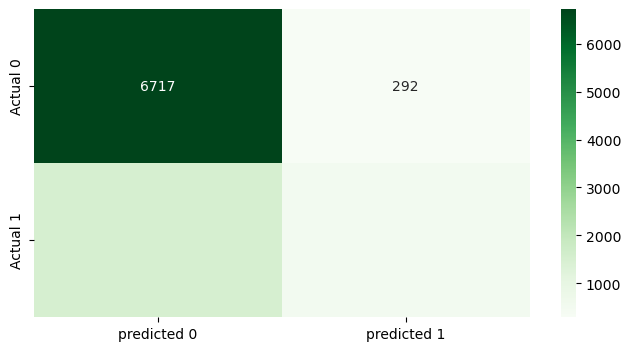

In [70]:
from sklearn.metrics import confusion_matrix
lgr_conf_matrix = confusion_matrix(y_test, y_pred)
lgr_conf = pd.DataFrame(data=lgr_conf_matrix, columns=['predicted 0', 'predicted 1'], index=['Actual 0', 'Actual 1'])

plt.figure(figsize=(8,4))
sns.heatmap(lgr_conf, annot=True, fmt='d', cmap='Greens')
plt.show()

## DECISION TREE MODEL

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=60)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_pred[:30]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [73]:
compare = pd.DataFrame({'dt_predictions': dt_pred, 'Actual class': y_test})
compare[:20]

,dt_predictions,Actual class
ID,,
8942,0,0
17619,0,1
27896,0,0
16104,1,0
4423,0,0
3834,0,0
26190,0,0
25055,0,1
23469,1,1


In [74]:
dt_acc = accuracy_score(dt_pred, y_test)
round(dt_acc, 3)

0.803

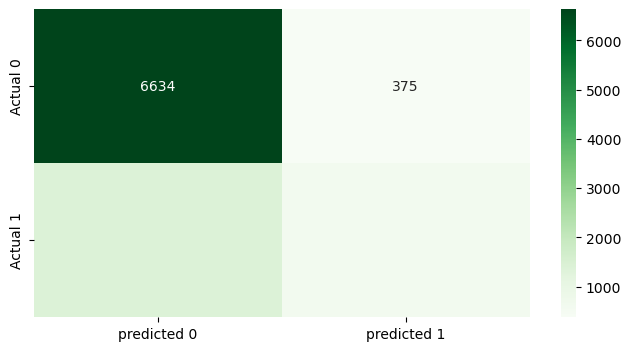

In [75]:
from sklearn.metrics import confusion_matrix
dt_conf_matrix = confusion_matrix(y_test, dt_pred)
dt_conf = pd.DataFrame(data=dt_conf_matrix, columns=['predicted 0', 'predicted 1'], index=['Actual 0', 'Actual 1'])

plt.figure(figsize=(8,4))
sns.heatmap(dt_conf, annot=True, fmt='d', cmap='Greens')
plt.show()

In [76]:
# Let us find out what feature was used by the decision tree classifier model to arrive at its predictions.
pd.Series(data=dt_model.feature_importances_, index=X_test.columns).sort_values(ascending=False).round(4)

months_delayed     0.8802
pay_amt2           0.0255
bill_amt1          0.0246
limit_bal          0.0194
pay_amt3           0.0187
bill_amt2          0.0081
pay_amt1           0.0063
bill_amt6          0.0059
pay_amt6           0.0031
bill_amt5          0.0025
bill_amt3          0.0021
age                0.0021
graduate_school    0.0015
bill_amt4          0.0000
pay_amt5           0.0000
pay_amt4           0.0000
male               0.0000
married            0.0000
university         0.0000
high_school        0.0000
dtype: float64

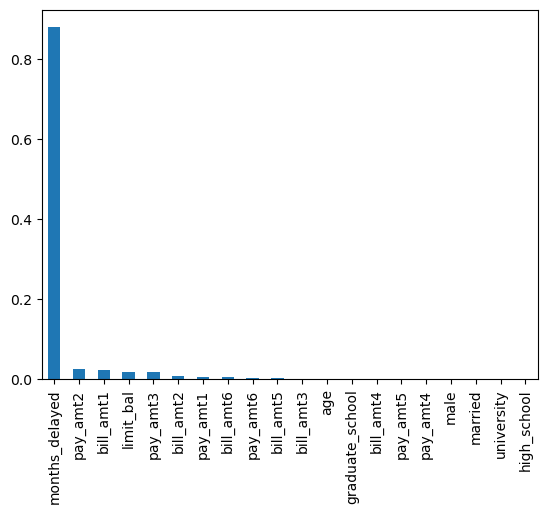

In [77]:
# To visualize this outcome
pd.Series(data=dt_model.feature_importances_, index=X_test.columns).sort_values(ascending=False).plot(kind='bar');

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=30)

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_pred[:20]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [79]:
compare = pd.DataFrame({'rf_predictions': rf_pred, 'Actual': y_test})
compare[:20]

,rf_predictions,Actual
ID,,
8942,0,0
17619,0,1
27896,0,0
16104,1,0
4423,0,0
3834,0,0
26190,0,0
25055,0,1
23469,1,1


In [80]:
rf_acc = accuracy_score(rf_pred, y_test)
round(rf_acc, 3)

0.798

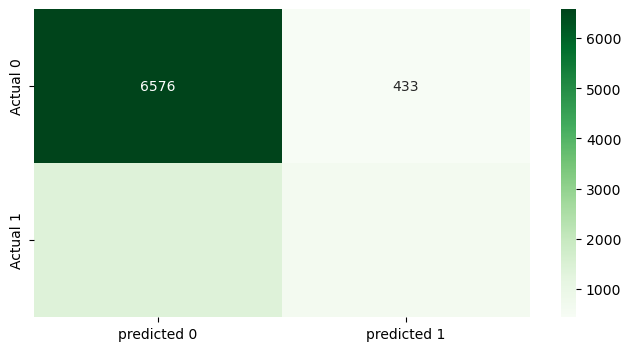

In [81]:
# Let's print the confusion matrix of the model
from sklearn.metrics import confusion_matrix
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_conf = pd.DataFrame(data=rf_conf_matrix, columns=['predicted 0', 'predicted 1'], index=['Actual 0', 'Actual 1'])

plt.figure(figsize=(8,4))
sns.heatmap(rf_conf, annot=True, fmt='d', cmap='Greens')
plt.show()

## XGBOOST CLASSIFIER

In [83]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

# Fit the model to the train data
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test)
xgb_pred[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [84]:
xgb_acc = accuracy_score(y_true=y_test, y_pred=xgb_pred)
print('lgr_Accuracy:', xgb_acc)
print('\nClassification report:', classification_report(y_test, xgb_pred))


lgr_Accuracy: 0.7907777777777778

Classification report:               precision    recall  f1-score   support

           0       0.83      0.93      0.87      7009
           1       0.55      0.31      0.40      1991

    accuracy                           0.79      9000
   macro avg       0.69      0.62      0.63      9000
weighted avg       0.76      0.79      0.77      9000



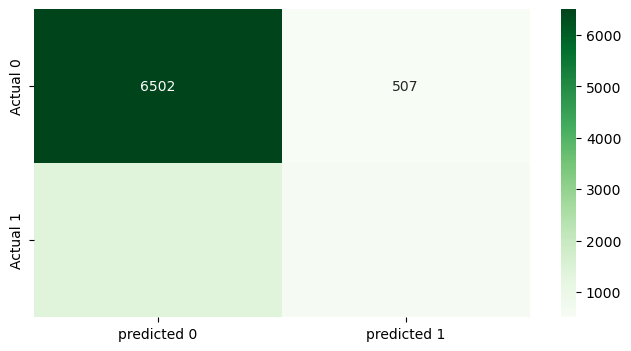

In [85]:
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)
xgb_conf = pd.DataFrame(data=xgb_conf_matrix, columns=['predicted 0', 'predicted 1'], index=['Actual 0', 'Actual 1'])

plt.figure(figsize=(8,4))
sns.heatmap(xgb_conf, annot=True, fmt='d', cmap='Greens')
plt.show()

### GaussianNB Model

In [87]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()

# Fit the model to the train data
gnb_model.fit(X_train, y_train)

# Make predictions
gnb_pred = gnb_model.predict(X_test)
gnb_pred[:10]

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [88]:
gnb_acc = accuracy_score(y_true=y_test, y_pred=gnb_pred)
print('gnb_Accuracy:', gnb_acc)
print('\nClassification report:', classification_report(y_test, gnb_pred))


gnb_Accuracy: 0.4921111111111111

Classification report:               precision    recall  f1-score   support

           0       0.89      0.40      0.55      7009
           1       0.28      0.82      0.42      1991

    accuracy                           0.49      9000
   macro avg       0.58      0.61      0.48      9000
weighted avg       0.75      0.49      0.52      9000



## Calculating the accuracy of the test and train data

In [90]:
accuracies = pd.DataFrame(columns=['test', 'train'], index=['Logistic regression', 'Decision Tree', 'Random Forest', 'Xgboost'])
model_dict = {'Logistic regression':logreg, 'Decision Tree':dt_model, 'Random Forest':rf_model, 'Xgboost':xgb_model}
for name, model in model_dict.items():
    accuracies.loc[name, 'train'] = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))
    accuracies.loc[name, 'test'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))
accuracies

,test,train
Logistic regression,0.801222,0.804667
Decision Tree,0.803333,0.808714
Random Forest,0.798444,0.995905
Xgboost,0.790778,0.902048


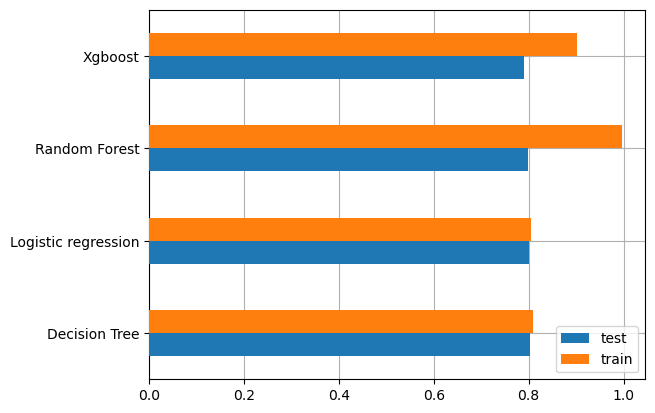

In [91]:
# Let's visualize this result.
fig, ax = plt.subplots()
accuracies.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

**Observations:**

- From the confusion matrix, we notice that all three model performed well in predicting customers who will likely pay the next compared, and performed poorly in predicting customers who are likely to default on their next payment.

- When using the train set, the random forest model achieved a near 100% accuracy ahead of other models used.

In [93]:
 # We will be using the Random forest model to buil a predictive web application, so we will save the model

In [94]:
import pickle
import joblib

with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
    


The issue with saving our model this way is that carries no metadata information, for instance, what is the version on which this model was trained? to answer this question we can serialize the model saving process with the below code snippet.

In [96]:
# Saving the model 

pickle_model = open('rf_model.pkl',mode='wb')
pickle.dump(rf_model, pickle_model)
pickle_model.close()


## HYPERPARAMETER TUNING*

In [98]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, cross_val_score

In [209]:
rf_model = RandomForestClassifier(n_estimators=5,
             max_depth=5,
             criterion= 'gini',
             max_leaf_nodes=None,
                 n_jobs=None,
                 random_state=5,
                 verbose=0)
rf_param_grid = {'n_estimators':list(range(1, 100, 5))}

rf_gs = GridSearchCV(rf_model,
                    param_grid=rf_param_grid,
                    cv=5,
                    n_jobs=None,
                    scoring='accuracy',
                    verbose=0,
                     error_score='raise',
                    return_train_score=True)

rfgs_model = rf_gs.fit(X_train, y_train)
best_rf_param = rf_gs.best_estimator_
rfgs_pred = rfgs_model.predict(X_test)
accuracy = round(metrics.accuracy_score(y_test, rfgs_pred), 4)
print("\nrfgs:", rfgs_pred)
print("\nAccuracy:", accuracy)
print("\nbest parameters:", best_rf_param)


rfgs: [0 0 0 ... 0 0 0]

Accuracy: 0.8042

best parameters: RandomForestClassifier(max_depth=5, n_estimators=6, random_state=5)
